In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

input_data=pd.read_csv('/content/heart.csv')


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       s

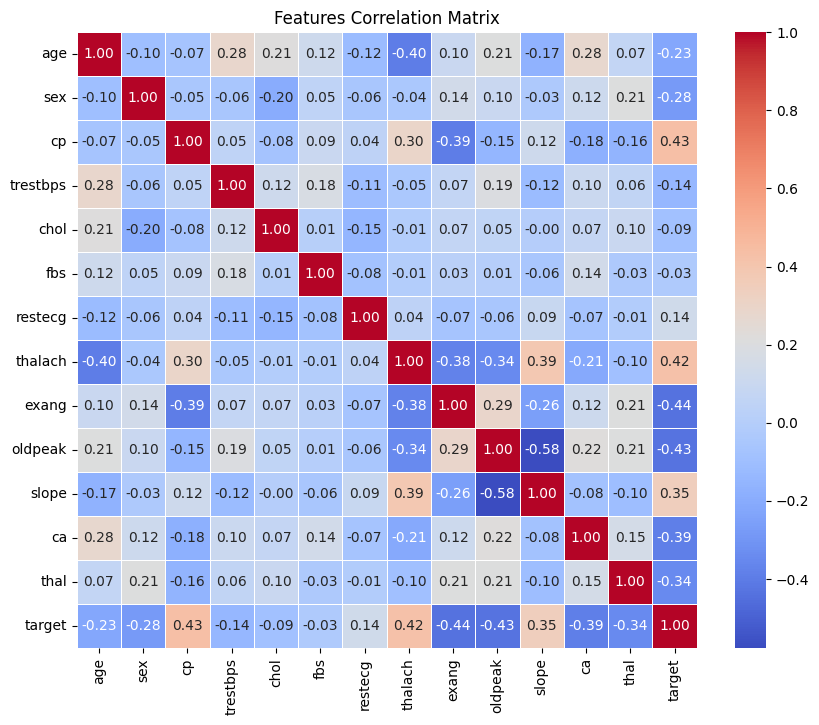

In [ ]:
##### Get some insights about the data #####
# Check if the data has null values
print(input_data.isnull().sum())
# Statistical Summary
print(input_data.describe())
# Correlation Matrix
correlation_matrix = input_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Features Correlation Matrix')
plt.show()


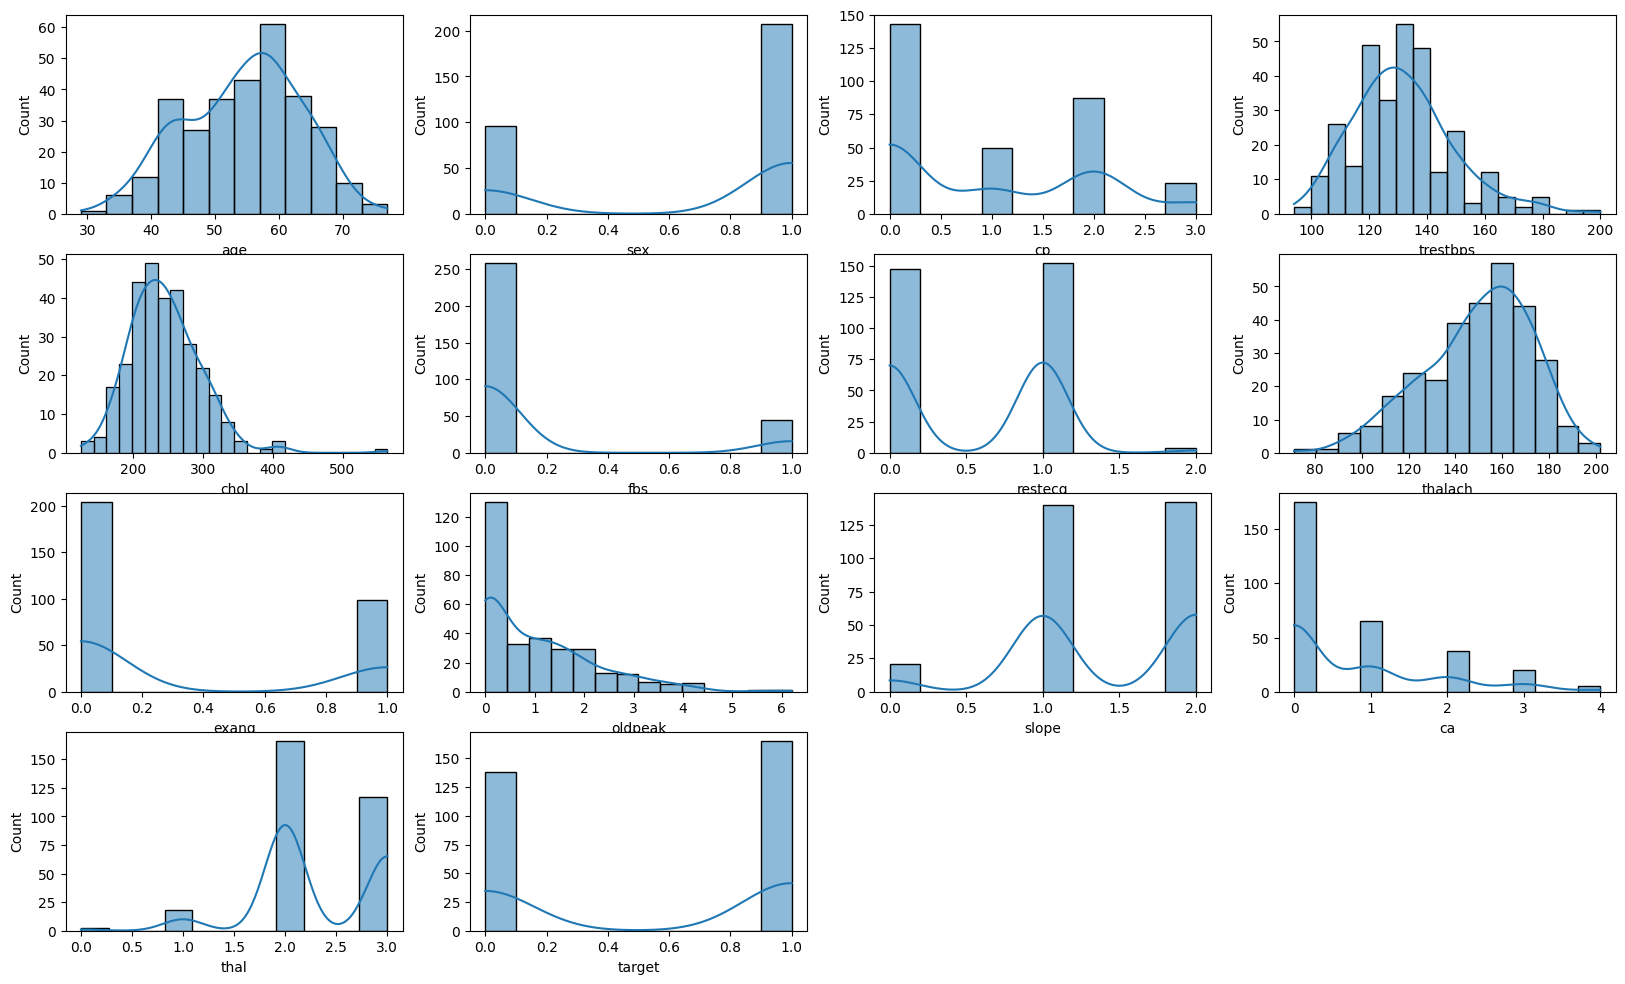

In [ ]:
##### Check features skewness #####
plt.figure(figsize=(20, 15))
for col in input_data.columns:
    plt.subplot(5, 4, list(input_data.columns).index(col) + 1)
    sns.histplot(input_data[col], kde=True)


plt.show()

In [ ]:
#####Data processing#####
#1# Age grouping
# Define age bins and labels for the age groups
bins = [29, 49, 79]
labels = ['29-49', '59-79']

# Create a new column 'AgeGroup' by applying the cut function
input_data['AgeGroup'] = pd.cut(input_data['age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with the 'AgeGroup' column
print(input_data[['age','AgeGroup']])


     age AgeGroup
0     63    59-79
1     37    29-49
2     41    29-49
3     56    59-79
4     57    59-79
..   ...      ...
298   57    59-79
299   45    29-49
300   68    59-79
301   57    59-79
302   57    59-79

[303 rows x 2 columns]


In [ ]:
#Apply logistic regression, evaluate using k-fold cross-validation

def evaluate_regression_model():
    return 'accuracy'

def apply_logistic_regression(input_data, features, target):
  #Assume features as X
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test_scaled)
    return 'ok'

In [ ]:
#Logestic Regrssion
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def compute_cost(X, y, W):
  m = len(y)
  h = sigmoid(X @ W)
  epsilon = 1e-5
  cost = (1/m)*(((-y).T @ np.log(h + epsilon))-
  ((1-y).T @ np.log(1-h + epsilon)))
  return cost

#This function gets the gradient descent iteratively
def gradient_descent(X, y, learning_rate, iterations):
  m = len(y)
  X= np.hstack((np.ones((m,1)),X))
  n = np.size(X,1)
  params = np.zeros((n,1))
  #cost_history = np.zeros((iterations,1))

  for i in range(iterations):
   params = params - (learning_rate/m) *(X.T @ (sigmoid(np.dot(X,params)) - y))
   #cost_history[i] = compute_cost(X, y, params)
  #return (cost_history, params)
   return params


def predict_new_samples(X, params):
  return np.round(sigmoid(X @ params))


#####Apply logestic regression on my data####
def apply_logistic_regression(target, features,iterations,learning_rate):
  m = len(target)
  features = np.hstack((np.ones((m,1)),features))
  n = np.size(features,1)
  #These are the initial parameters
  params = np.zeros((n,1))
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


  params_optimal = gradient_descent(X_train, y_train, params,learning_rate, iterations)
  predicted_y = predict_new_samples(X_val,params_optimal )
  accuracy = accuracy_score(y_test, predicted_y)

  return  accuracy